# Electric Car Comparison

### Kristoffer Sorensen - 11/22/2021

Since electric vehicles are becoming more prominent now than ever before, understanding what makes each car different is important when it comes to choosing one over the other. The following data was collected through Kaggle, and contains several different companies. Columns contain information regarding range, drivetrain, plug type, supercharge, and more, and with this data, we can compile a list of the most reasonable vehicles for families of n size and needs. 

Data will be compounded through several modules within python, finishing with basic forms of Machine Learning for future analytics. The purpose of this project is to combine useful information for a new way of transportation, and looking for the best sutors. 

Eventually, the cleaned data can be compared with current combustion engine vehicles to help answer the question regarding if Electric vehicles are better or worse than their predecessors. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

In [2]:
# Start with importing the dataset through pandas, and create a dataframe

ev_df = pd.read_csv("ElectricCarData_Norm.csv")
ev_df.Brand = ev_df.Brand.str.strip()

# The data is in English units, conversion will have to be done through the use of python functions
# ev_df[ev_df['BodyStyle'] == 'Sedan']

In [3]:
# look at types in df
ev_df.dtypes

Brand          object
Model          object
Accel          object
TopSpeed       object
Range          object
Efficiency     object
FastCharge     object
RapidCharge    object
PowerTrain     object
PlugType       object
BodyStyle      object
Segment        object
Seats           int64
PriceEuro       int64
dtype: object

In [4]:
# Several of these columns need to be converted, which requires some removal of characters

cols = ['TopSpeed', 'Range', 'Efficiency', 'FastCharge']

# function looks at four of the inital five columns and converts them after removing units
def remove_unit(unit):
    for x in unit:
        ev_df[x] = ev_df[x].replace(r'\D+','', regex=True)
        ev_df[x] = ev_df[x].astype(str)
            
remove_unit(cols)

# if/else to check if the function has been run already since it is expecting a string, once it has been run once
# it is converted to a float so an attribute error is called
if ev_df.Accel.dtypes == 'object':
    ev_df['Accel'] = ev_df['Accel'].str.replace('[^\d.]', '').astype(float)
else:
    pass

# Converting all other columns to their respective types after regex above
ev_df['TopSpeed'] = ev_df['TopSpeed'].astype(int)
ev_df['Range'] = ev_df['Range'].astype(int)
ev_df['Efficiency'] = ev_df['Efficiency'].astype(int)
ev_df['FastCharge'] = ev_df['FastCharge'].replace(r'', 0).astype(int)

/tmp/ipykernel_76/2197441120.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  ev_df['Accel'] = ev_df['Accel'].str.replace('[^\d.]', '').astype(float)


In [5]:
# Check to see if values were updated to their correct type
ev_df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed         int64
Range            int64
Efficiency       int64
FastCharge       int64
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [6]:
ev_df.head(5)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [7]:
# Now we need to convert to American units for the four columns above and the price on the far right.
# 1km ~ 0.621mi | 1 GBP ~ 1.33 USD

In [8]:
# start by creating a lambda function to convert the price into USD
ev_df['PriceUSD'] = ev_df['PriceEuro'].apply(lambda x: x * 1.33)

# A similar process can be done to convert all km to mi
ev_df['TopSpeed'] = ev_df['TopSpeed'].apply(lambda x: round(x / 1.609, 0))
ev_df['Range'] = ev_df['Range'].apply(lambda x: round(x / 1.609, 0))
ev_df['Efficiency'] = ev_df['Efficiency'].apply(lambda x: round(x / 1.609, 0))
ev_df['FastCharge'] = ev_df['FastCharge'].apply(lambda x: round(x / 1.609, 0))

In [42]:
ev_df.head(5)
# ev_df[ev_df['Brand'] == 'Ford']

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceUSD
0,Tesla,Model 3 Long Range Dual Motor,4.6,145.0,280.0,100.0,584.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,D,5,55480,73788.40
1,Volkswagen,ID.3 Pure,10.0,99.0,168.0,104.0,155.0,Rapid charging possible,RWD,Type 2 CCS,Hatchback,C,5,30000,39900.00
2,Polestar,2,4.7,131.0,249.0,112.0,385.0,Rapid charging possible,AWD,Type 2 CCS,Liftback,D,5,56440,75065.20
3,BMW,iX3,6.8,112.0,224.0,128.0,348.0,Rapid charging possible,RWD,Type 2 CCS,SUV,D,5,68040,90493.20
4,Honda,e,9.5,90.0,106.0,104.0,118.0,Rapid charging possible,RWD,Type 2 CCS,Hatchback,B,4,32997,43886.01


In [10]:
# Another replacement idea would be convert 'All Wheel Drive' and 'Rear/Front Wheel Drive' into AWD, RWD, and FWD.
ev_df['PowerTrain'] = ev_df['PowerTrain'].replace({'All Wheel Drive':'AWD', 'Rear Wheel Drive': 'RWD',
                                                 'Front Wheel Drive':'FWD'})

ev_df.head(2)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceUSD
0,Tesla,Model 3 Long Range Dual Motor,4.6,145.0,280.0,100.0,584.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,D,5,55480,73788.4
1,Volkswagen,ID.3 Pure,10.0,99.0,168.0,104.0,155.0,Rapid charging possible,RWD,Type 2 CCS,Hatchback,C,5,30000,39900.0


In [11]:
# Conversions are complete, lets look into some indicator variables in the segments column using get_dummies

pd.get_dummies(ev_df, columns=['Segment']).head(5)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,...,PriceEuro,PriceUSD,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,Tesla,Model 3 Long Range Dual Motor,4.6,145.0,280.0,100.0,584.0,Rapid charging possible,AWD,Type 2 CCS,...,55480,73788.40,0,0,0,1,0,0,0,0
1,Volkswagen,ID.3 Pure,10.0,99.0,168.0,104.0,155.0,Rapid charging possible,RWD,Type 2 CCS,...,30000,39900.00,0,0,1,0,0,0,0,0
2,Polestar,2,4.7,131.0,249.0,112.0,385.0,Rapid charging possible,AWD,Type 2 CCS,...,56440,75065.20,0,0,0,1,0,0,0,0
3,BMW,iX3,6.8,112.0,224.0,128.0,348.0,Rapid charging possible,RWD,Type 2 CCS,...,68040,90493.20,0,0,0,1,0,0,0,0
4,Honda,e,9.5,90.0,106.0,104.0,118.0,Rapid charging possible,RWD,Type 2 CCS,...,32997,43886.01,0,1,0,0,0,0,0,0


In [12]:
# Several groupby applications can be applied to this data, including brand, body style, power train, etc.
# Some consumers may be more inclined to buy a vehicle that can sit 4 people over 5, or 2 over 4, and so on.
# Lets look at grouping by brand first, we can run some statistics on body types within brands and compare with others,
# looking into which brand may offer the more affordable yet capable SUV/sedan/truck

ev_brands = ev_df.groupby(['Brand', 'Model']).first()
ev_brands.head(5)

Accel  TopSpeed  Range  Efficiency  FastCharge  \
Brand  Model                                                                  
Aiways U5                      9.0      93.0  208.0       117.0       218.0   
Audi   Q4 Sportback e-tron     6.3     112.0  255.0       117.0       342.0   
       Q4 e-tron               6.3     112.0  249.0       120.0       336.0   
       e-tron 50 quattro       6.8     118.0  174.0       144.0       280.0   
       e-tron 55 quattro       5.7     124.0  227.0       147.0       367.0   

                                         RapidCharge PowerTrain    PlugType  \
Brand  Model                                                                  
Aiways U5                    Rapid charging possible        FWD  Type 2 CCS   
Audi   Q4 Sportback e-tron   Rapid charging possible        AWD  Type 2 CCS   
       Q4 e-tron             Rapid charging possible        AWD  Type 2 CCS   
       e-tron 50 quattro     Rapid charging possible        AWD  Type 2 CCS   
       e-tron 55 quattro     Rapid charging possible        AWD  Type 2 CCS   

                            BodyStyle Segment  Seats  PriceEuro   PriceUSD  
Brand  Model                                                                
Aiways U5                         SUV       C      5      36057   47955.81  
Audi   Q4 Sportback e-tron        SUV       D      5      57500   76475.00  
       Q4 e-tron                  SUV       D      5      55000   73150.00  
       e-tron 50 quattro          SUV       E      5      67358   89586.14  
       e-tron 55 quattro          SUV       E      5      79445  105661.85

## Sedans

In [43]:
# Lets look at sedans
sedan_evs = ev_df[ev_df['BodyStyle'] == 'Sedan'].copy()
sedan_evs # = 10 total\

sedan_evs['Model'] = sedan_evs['Model'].str.strip()
sedan_evs

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceUSD
0,Tesla,Model 3 Long Range Dual Motor,4.6,145.0,280.0,100.0,584.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,D,5,55480,73788.40
5,Lucid,Air,2.8,155.0,379.0,112.0,385.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,F,5,105000,139650.00
8,Tesla,Model 3 Standard Range Plus,5.6,140.0,193.0,95.0,404.0,Rapid charging possible,RWD,Type 2 CCS,Sedan,D,5,46380,61685.40
13,BMW,i4,4.0,124.0,280.0,111.0,404.0,Rapid charging possible,RWD,Type 2 CCS,Sedan,D,5,65000,86450.00
16,Porsche,Taycan Turbo S,2.8,162.0,233.0,139.0,485.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,F,4,180781,240438.73
23,Audi,e-tron GT,3.5,149.0,264.0,122.0,528.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,F,4,125000,166250.00
24,Tesla,Model 3 Long Range Performance,3.4,162.0,270.0,104.0,566.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,D,5,61480,81768.40
47,Porsche,Taycan 4S,4.0,155.0,227.0,121.0,454.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,F,4,102945,136916.85
65,Porsche,Taycan 4S Plus,4.0,155.0,264.0,122.0,553.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,F,4,109302,145371.66
79,Porsche,Taycan Turbo,3.2,162.0,242.0,134.0,503.0,Rapid charging possible,AWD,Type 2 CCS,Sedan,F,4,148301,197240.33


In [44]:
# Create a function to display the top speeds above the bars in the graph below
def mph_of_sedans(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 5, y[i], ha = 'center', Bbox = dict(facecolor = 'green', alpha =.8, edgecolor='black'))

/tmp/ipykernel_76/1002092008.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i] + 5, y[i], ha = 'center', Bbox = dict(facecolor = 'green', alpha =.8, edgecolor='black'))


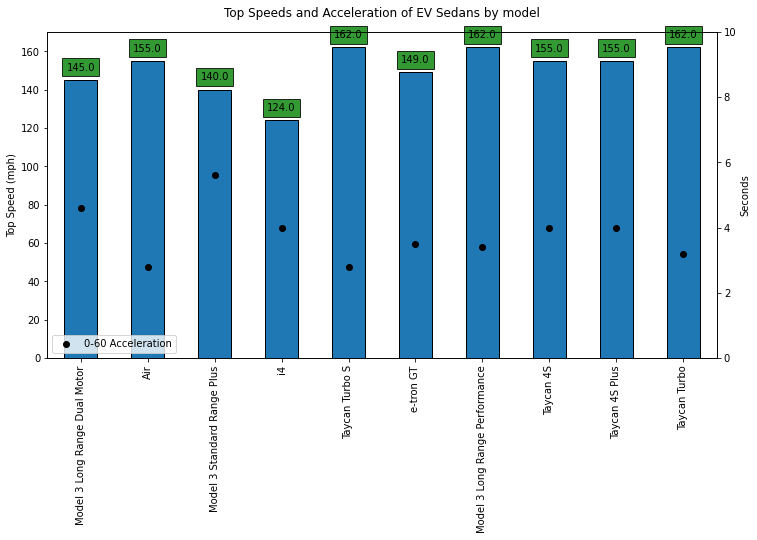

In [45]:
# Lets plot some data regarding ev sedans
plt.figure(figsize=(12, 6))
ax1 = sedan_evs['TopSpeed'].plot(kind='bar', edgecolor = "black")
x_ax = sedan_evs['Model']
ax1.set_ylabel('Top Speed (mph)')
ax1.set_title('Top Speeds and Acceleration of EV Sedans by model', pad=15)
ax1.set_xticklabels(x_ax)
mph_of_sedans(sedan_evs['Model'], sedan_evs['TopSpeed'].values)

# We can also plot the acceleration of each car on the same graph using a dual y-axis
axes2 = plt.twinx()
axes2.scatter(sedan_evs['Model'], sedan_evs['Accel'], color = 'black', label='0-60 Acceleration')
axes2.set_ylim(0, 10)
axes2.set_ylabel('Seconds')
axes2.legend(loc='lower left')

plt.show()

<AxesSubplot:>

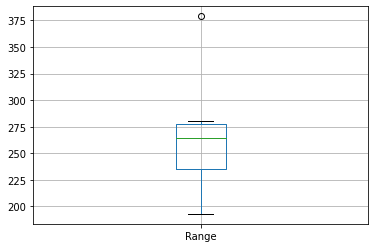

In [35]:
# Create a boxplot to identify quartile ranges and min/max of sedan RANGE values

sedan_evs.boxplot(column='Range')

# Its worthy to note that we have an outlier at the very top, which is Lucid's Air. Assuming the vehicle is a true, buyable
# car (not a concept), it has the longest range of any current EV sedan.